# ReSubmit Project 2 : Investigate a Dataset (Medical Appointment No Shows "KaggleV2-May-2016.csv")

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set focuses on collecting information from 100K medical reservations in Brazil and on questions about whether the patient appears in their reservations. Each line includes some characteristics about the patient.
- The "ScheduledDay" tells us the day when the patient is appointed.
- The " neighborhood" indicates the location of the hospital.
- The "Scholarship" indicates whether the patient is registered in the Brazilian welfare program Bolsa Familia.

- Beware of the encryption of the last column: if the patient appears at their appointment, say “No” and if they don’t appear, say “Yes”.

the i need to to do some operations to answer some questions about this dataset and this my goal 

Question(s) for Analysis:

- What is the show-and-no-show rate?

- what is the most factor effect the showing status?

- what is the most factor effect the showing status?

- does the gender effect the showing status?

- does the Age effect the showing status?

- Is there a relationship between age and gender ?

- Age is effect in the health so ,
- Is there a relationship between age and some diseases?

- Does living in a certain area effect showing status?

- Is there a relation between living in certain area and ages that effected showing status ?

- Does Receiving SMS effect showing status?

- last question, Is there a relation between receiving SMS and living in certain area that effected showing status ?



, so let's get started 

In [1]:
# Import the statement for the packages i will use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Include a 'magic word' so that my visualizations are plotted
%matplotlib inline

#AttributeError: module 'seaborn' has no attribute 'histplot'
so,
I upgrade seaborn using this command on my terminal pip3 install -U seaborn because histplot was added in version 0.11 and i used it below

but before that i upgrade pip using pip3 install --upgrade pip and Successfully installed cycler-0.11.0 fonttools-4.33.3 kiwisolver-1.4.2 matplotlib-3.5.2 numpy-1.22.3 packaging-21.3 pandas-1.4.2 pillow-9.1.0 pyparsing-3.0.9 python-dateutil-2.8.2 pytz-2022.1 scipy-1.8.0 seaborn-0.11.2

In [2]:
!pip3 install --upgrade pip 
!pip3 install -U seaborn 

/Users/mostafaayman/.zshenv:2: parse error near `JAVA_HOME=$(/usr/lib...'
/Users/mostafaayman/.zshenv:2: parse error near `JAVA_HOME=$(/usr/lib...'


In [3]:
#check the version 
print(sns.__version__)

0.11.2


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, i will be able to load the data and check for cleanliness, then trim and clean the dataset for analysis.
### General Properties

In [4]:
# Load the data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

#Load the data to a dataframe

df = pd.read_csv('KaggleV2-May-2016.csv')

#know the format of the dataset from the first 5 rows

df.head(5) 



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


First observation :

The column names are spelled incorrectly

In [5]:
#know the size of the dataset and print it
print('The Number of records in rows and columns in this dataset is =',df.shape)

The Number of records in rows and columns in this dataset is = (110527, 14)


In [6]:
#Now i will get some more information about the dataframe
#to expect there to be a missing values to be cleaned 
df.info()
print()
print('The information is columns and rows numbers , column dtypes, non null values and memory usage')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB

The information is columns and rows numbers , column dtypes, non null values and memory u

In [7]:
#Now i will get some another information about the dataset Statistics and distribution 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We get some statistics like count , mean , Standard deviation , minimum , Q1 , Q2 , Q3 , and the maximum

From the observations i found that :
- The average of age is 37 years and 25% is under 18 years and most of them under 55 years and the max is 115 years and the min is -1 and this cannot be true because of this i know there is a problem in data set to be corrected 
- The majority in scholarship are not alcoholism 
- There are 4 classes of handicap and the majority are not handicapped
- About 25% received sms

In [8]:
#Now to check if there are duplicates in the dataset
#The sum() function adds the items of an iterable and returns the sum

print('The Number of duplicates in rows is =',df.duplicated().sum())
print()

#Then check if there are null data in the dataset

print('The Number of Null data in every coulmn in dataset is = \n',df.isnull().sum())
print()

#Then check the number of unique values in each column in the dataset

print('The Number of unique values in every coulmn in dataset is = \n',df.nunique())



The Number of duplicates in rows is = 0

The Number of Null data in every coulmn in dataset is = 
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The Number of unique values in every coulmn in dataset is = 
 PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


There is no duplication in rows of dataset , no null values and AppointmentID is the only unique data , while there is a 62299 of 110527 of PatientId is unique 

Therefore i need to cheack the duplicated PatientId and if it's with the same value in No-Show column or not

### Data Cleaning 

After discussing the structure of the data and any problems that need to be cleaned

First i need to correct the columns names 



In [9]:
#rename() method is used to rename any index, column or row.
df.rename(columns={'Neighbourhood':'Neighborhood','Hipertension':'Hypertension','No-show':'Show','Handcap':'Handicap'}, inplace=True)
#Cheak After Renaming 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
#As we changed the No-show to Show to make it easy to read  so i need to change the value also 
#The map() function applies a given function to each item of an iterable (list, tuple etc.) and returns an iterator
df['Show']=df['Show'].map({'No':'Yes', 'Yes': 'No'})
#cheak the values
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [11]:
#Check for the value that make a problem in age which is -1 value
#The query() function is used to query the columns of a DataFrame with a boolean expression
check_value = df.query('Age=="-1"')
check_value

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show


Now i know the index which is 99832

Then i need to remove it to correct our data , and which is a one row from more than 100k of rows that doesn't effect our data

In [12]:
#The drop() method removes the specified row or column
df.drop(index=99832,inplace=True)
#check the dataset after remove this row
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum is 0 now

In [13]:
#Now i need to check the Patientldid duplicating
print('The Number of duplicated patientid in this dataset is =',df['PatientId'].duplicated().sum())
#Then check the Patientldid and Show status to know if there are a duplicated patientid but difference in Showing status 
print('The Number of duplicated patientid and have the same status in this dataset is =',df.duplicated(['PatientId','Show']).sum())

The Number of duplicated patientid in this dataset is = 48228
The Number of duplicated patientid and have the same status in this dataset is = 38710


then now we need to remove them

In [14]:
#remove the duplicated patientid with same status but keep the duplicated patientid with different Status 
df.drop_duplicates(['PatientId','Show'],inplace=True)
#check The size again after removing 
df.shape

(71816, 14)

In [15]:
#last I need to remove the unwanted data that doesn't effect my analysis or my questions
#Axis = 1 because i need to remove columns 
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
#then check
df.head()

,Gender,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


## Summary Of Data Wrangling 

First i know my data and know some information about it like the size and the format of it , then i checked for the error like spelling in names and null data and duplicating data to know what should i do on it and get some distributions like min and max and mean this help me in cleaning my data like i had in -1 value on age 
the i correct all the data need to be cleaning and remove the unwanted data to go to the next step

<a id='eda'></a>
## Exploratory Data Analysis

Now after i have trimmed and cleaned the data, I'm  ready to move on to exploration. Compute statistics and create visualizations with the goal of Answer some questions about this data. 
## What is the show-and-no-show rate?

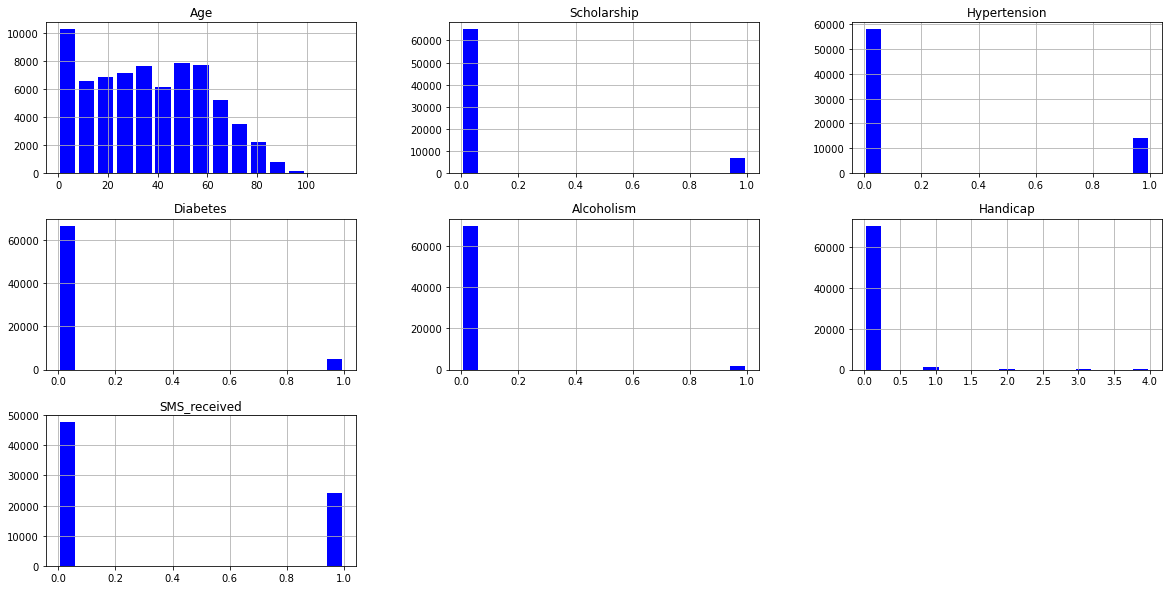

In [16]:
#Explore the data and get a general view about every column 
#create a histogram
#the ; is to remove unwanted text and specify no. of bins and the size,colors and width between each line
df.hist(bins=15, figsize=(20,10), color='#0000FF', rwidth=0.8);


we get an overview the ages between 1 to 105 and most of patients doesn't alcoholism and no diabetes and no handicap or hypertension, and who doesn't receive sms is more than who received and most of them have a scholarship

In [17]:
#Now i need to divide the dataset into two groups , group1 for Show and group2 for No Show
Show = df.Show=="Yes"
No_Show = df.Show=="No"

In [18]:
df[Show].count(),df[No_Show].count()

(Gender          54153
 Age             54153
 Neighborhood    54153
 Scholarship     54153
 Hypertension    54153
 Diabetes        54153
 Alcoholism      54153
 Handicap        54153
 SMS_received    54153
 Show            54153
 dtype: int64,
 Gender          17663
 Age             17663
 Neighborhood    17663
 Scholarship     17663
 Hypertension    17663
 Diabetes        17663
 Alcoholism      17663
 Handicap        17663
 SMS_received    17663
 Show            17663
 dtype: int64)

Number of patients Shows is greater than who doesn't show

In [19]:
#/10 because we check for show column and the other 9 columns will be the same value
print('The Number Of Patients Shows is =',int(df[Show].count().sum()/10)),
print('The Number Of Patients No Shows is =',int(df[No_Show].count().sum()/10))

The Number Of Patients Shows is = 54153
The Number Of Patients No Shows is = 17663


In [20]:
df.shape

(71816, 10)

In [21]:
# define percentage function, total_no is the total number of rows which is = 71816
def percentage(number, total_no):
    return number / total_no

In [22]:
# calculate the percentage of patients show
df_show = df[df.Show == 'Yes']
num_show = df_show['Show'].count()
per_show = percentage(num_show, total_no = 71816)
print(per_show)

0.7540520218335747


In [23]:
# calculate the percentage of patients no show
df_noshow = df[df.Show == 'No']
num_noshow = df_noshow['Show'].count()
per_noshow = percentage(num_noshow, total_no = 71816)
print(per_noshow)

0.2459479781664253


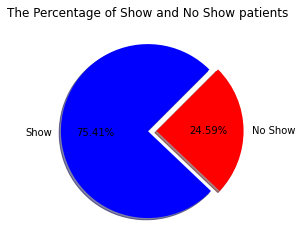

In [24]:
# create a pie chart to show the percentage of the patients show or not show 
sizes = np.array([per_show, per_noshow])
labels = 'Show', 'No Show'
colors = ["blue", "red"]
explode = (0.0, 0.1)
plt.pie(sizes, labels = labels, colors=colors, explode=explode ,shadow=True, autopct='%.2f%%', startangle=45)
plt.title('The Percentage of Show and No Show patients')
plt.show()

After I know that there is a large number of patients doesn't shows , then there is a questions :

## what is the most factor effect the showing status?

In [25]:
# Using numeric_only=True causes df.mean() 
#to ignore columns that contain non-numbers, and only calculate the mean for columns that only contain numbers
df[Show].mean(numeric_only=True),df[No_Show].mean(numeric_only=True)

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handicap         0.020904
 SMS_received     0.297232
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handicap         0.017777
 SMS_received     0.453094
 dtype: float64)

from here we find that the average age is 37 in show and the average is 34 in no show appointments
, and in no show thw patients who received sms more than in show patients that means we have a problem with sms system

In [26]:
df_show = df[df.Show == 'Yes']
df_show['Gender'].count()

54153

In [27]:
df_noshow = df[df.Show == 'No']
df_noshow['Gender'].count()

17663

## does the gender effect the showing status?


In [28]:
#calculate The Number Of Males and Show
males_show = df_show['Gender'] == 'M'
males_show_count = df_show[males_show]['Gender'].count()
per_show_males = percentage(males_show_count, total_no = 54153)
print("The Number of Male count of shows is = ", males_show_count)

The Number of Male count of shows is =  19193


In [29]:
#calculate The Number Of Males and No Show
males_noshow = df_noshow['Gender'] == 'M'
males_noshow_count = df_noshow[males_noshow]['Gender'].count()
per_noshow_males = percentage(males_noshow_count, total_no = 17663)
print("The Number of Male count of no shows is = ", males_noshow_count)

The Number of Male count of no shows is =  6157


In [30]:
#calculate The Number Of Females and Show
females_show = df_show['Gender'] == 'F'
females_show_count = df_show[females_show]['Gender'].count()
per_show_females = percentage(females_show_count, total_no = 54153)
print("The Number of Females count of shows is = ", females_show_count)

The Number of Females count of shows is =  34960


In [31]:
#calculate The Number Of Females and No Show
females_noshow = df_noshow['Gender'] == 'F'
females_noshow_count = df_noshow[females_noshow]['Gender'].count()
per_noshow_females = percentage(females_noshow_count, total_no = 17663)
print("The Number of Females count of no shows is = ", females_noshow_count)

The Number of Females count of no shows is =  11506


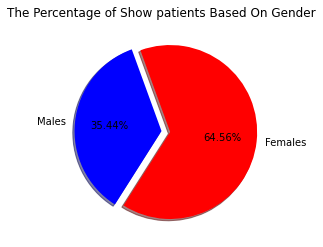

In [32]:
# create a pie chart to show the percentage of the patients no show based on gender 
sizes = np.array([per_show_males, per_show_females])
labels = 'Males', 'Females'
colors = ["blue", "red"]
explode = (0.0, 0.1)
plt.pie(sizes, labels = labels, colors=colors, explode=explode ,shadow=True, autopct='%.2f%%', startangle=110)
plt.title('The Percentage of Show patients Based On Gender')
plt.show()

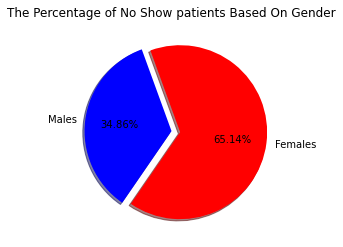

In [33]:
# create a pie chart to show the percentage of the patients no show based on gender 
sizes = np.array([per_noshow_males, per_noshow_females])
labels = 'Males', 'Females'
colors = ["blue", "red"]
explode = (0.0, 0.1)
plt.pie(sizes, labels = labels, colors=colors , explode=explode ,shadow=True, autopct='%.2f%%', startangle=110)
plt.title('The Percentage of No Show patients Based On Gender')
plt.show()

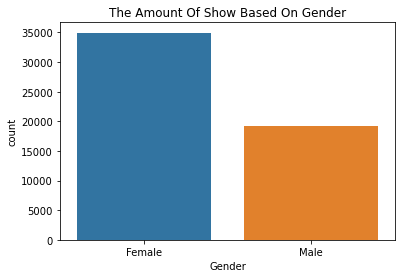

In [34]:
#using seaborn to show the counts of observations in each categorical bin using bars
count_plot = sns.countplot(x=df_show.Gender.replace({'M':'Male','F':'Female'}));
count_plot.set_title('The Amount Of Show Based On Gender');

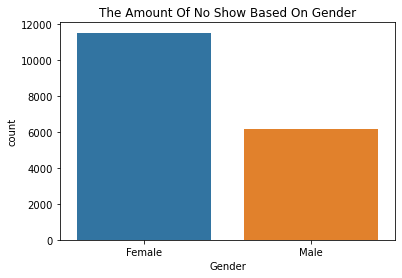

In [35]:
#using seaborn to show the counts of observations in each categorical bin using bars
count_plot = sns.countplot(x=df_noshow.Gender.replace({'M':'Male','F':'Female'}));
count_plot.set_title('The Amount Of No Show Based On Gender');

From That we found that the gender has no effect in showing status because there is no much difference in showing status or not on each , in both females is larger , so we needs more investigation to know more relations between other factors

## does the Age effect the showing status?

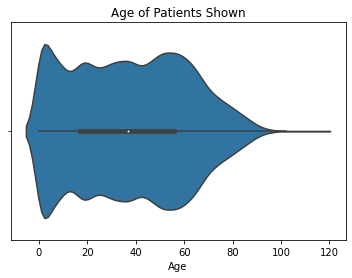

In [36]:
#showing the ages of showin patients in dataset
#using A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared
ages_showin = sns.violinplot(x=df_show['Age']);
ages_showin.set_title('Age of Patients Shown');

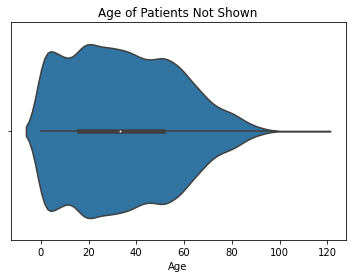

In [37]:
#showing the ages of no showin patients in dataset
#using A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared
ages_showin = sns.violinplot(x=df_noshow['Age']);
ages_showin.set_title('Age of Patients Not Shown');

 From Observation:Most ages of patients shown is around 55:60 and most ages not shown is around 20:25

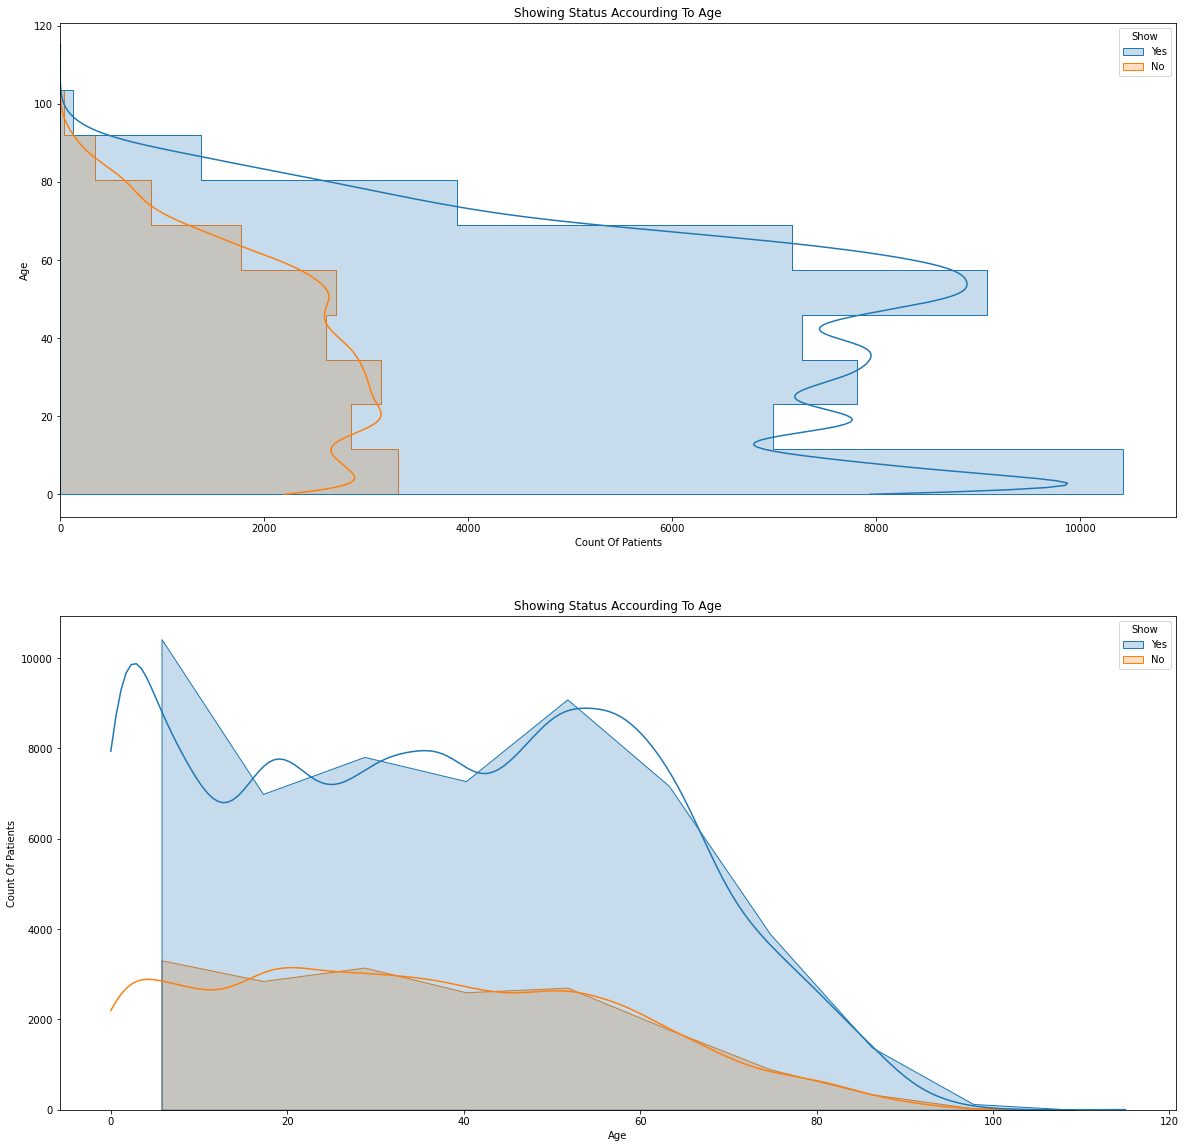

In [38]:
plt.figure(figsize=[20,20])
#y to make it horizontally and hue is names of variables in data
#subplot(rows,columns,plot no.) function adds subplot to a current figure at the specified grid position
#y to make it horizontally and hue is names of variables in data
#kde : kernel density to smooth the histogram
plt.subplot(2,1,1);
sns.histplot(y='Age',hue='Show',data=df,element="step",bins=10,kde=True);
plt.title('Showing Status Accourding To Age');
plt.ylabel('Age');
plt.xlabel('Count Of Patients');
plt.subplot(2,1,2);
#poly make it easier to see the shape of the distribution
sns.histplot(x='Age',hue='Show',data=df,element="poly",bins=10,kde=True);
plt.title('Showing Status Accourding To Age');
plt.xlabel('Age');
plt.ylabel('Count Of Patients');

we found that from 0 : 15 ages Approximately is the most showing and that means his parents is care about them and the health of his kids then we notice that show growing from 40:55 Approximately and then fade and fade after 80 , 90 , 100,.....

## Is there a relationship between age and gender ?

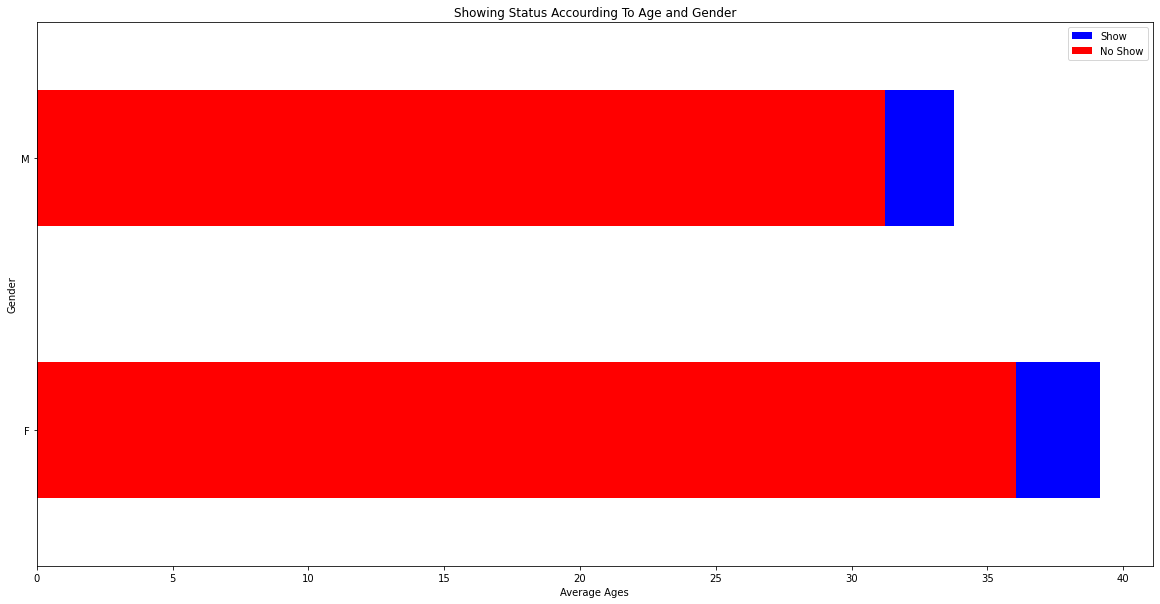

In [39]:
plt.figure(figsize=[20,10])
#A groupby operation involves some combination of splitting the object, applying a function, and combining the results.
# This can be used to group large amounts of data and compute operations on these groups.
df[Show].groupby(['Gender']).Age.mean().plot(kind='barh',color='blue',label='Show')
df[No_Show].groupby(['Gender']).Age.mean().plot(kind='barh',color='red',label='No Show')
plt.title('Showing Status Accourding To Age and Gender')
plt.xlabel('Average Ages')
plt.ylabel('Gender')
plt.legend();

In [40]:
#show this plot in number
df[Show].groupby(['Gender']).Age.mean(),df[No_Show].groupby(['Gender']).Age.mean()

(Gender
 F    39.130292
 M    33.766269
 Name: Age, dtype: float64,
 Gender
 F    36.06501
 M    31.22040
 Name: Age, dtype: float64)

In [41]:
#as its an age the median is givin some statistics 
df[Show].groupby(['Gender']).Age.median(),df[No_Show].groupby(['Gender']).Age.median()

(Gender
 F    39.0
 M    32.0
 Name: Age, dtype: float64,
 Gender
 F    34.0
 M    29.0
 Name: Age, dtype: float64)

there is no relation between age and gender that effect the showing status , it's almost the same in show or no show for mean and median

## Age is effect in the health so ,
## Is there a relationship between age and some diseases?

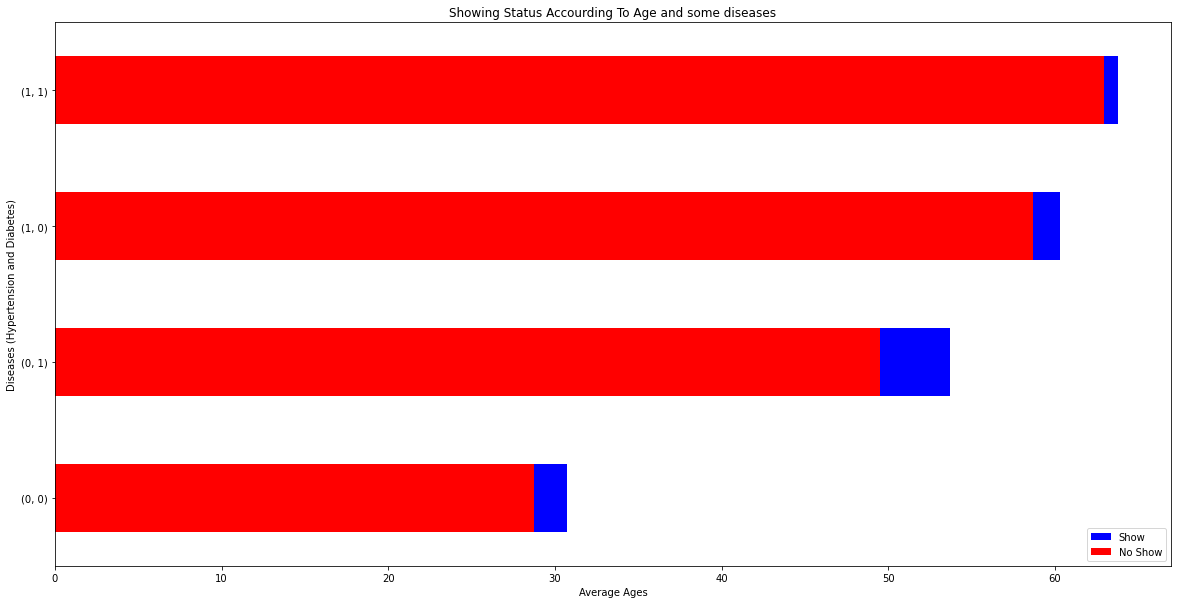

In [42]:
plt.figure(figsize=[20,10])
df[Show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='barh',color='blue',label='Show')
df[No_Show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='barh',color='red',label='No Show')
plt.title('Showing Status Accourding To Age and some diseases')
plt.xlabel('Average Ages')
plt.ylabel('Diseases (Hypertension and Diabetes)')
plt.legend();

In [43]:
#show this plot in number
df[Show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[No_Show].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

0 , 0 is for who doesn't have hypertension or diabetes ,and the average ages is 30 for show and 28 for no show

0 , 1 is for who Doesn't have hypertension and having diabetes ,and the average ages is 53 for show and 49 for no show

1 , 0 is for who have hypertension but Doesn't have diabetes ,and the average ages is 60 for show and 58 for no show

1 , 1 is for who have hypertension and diabetes ,and the average ages is more than 60

from that we notice that there are a proportional relationship between having one or the two diseases and no showing but this doesn't effect of the showing status



## I checked the most factors to know about the showing status and age and if it have a relation with other factor
Now i will go through the two last factors wwhich is Neighborhood and SMS_received

## Does living in a certain area effect showing status?

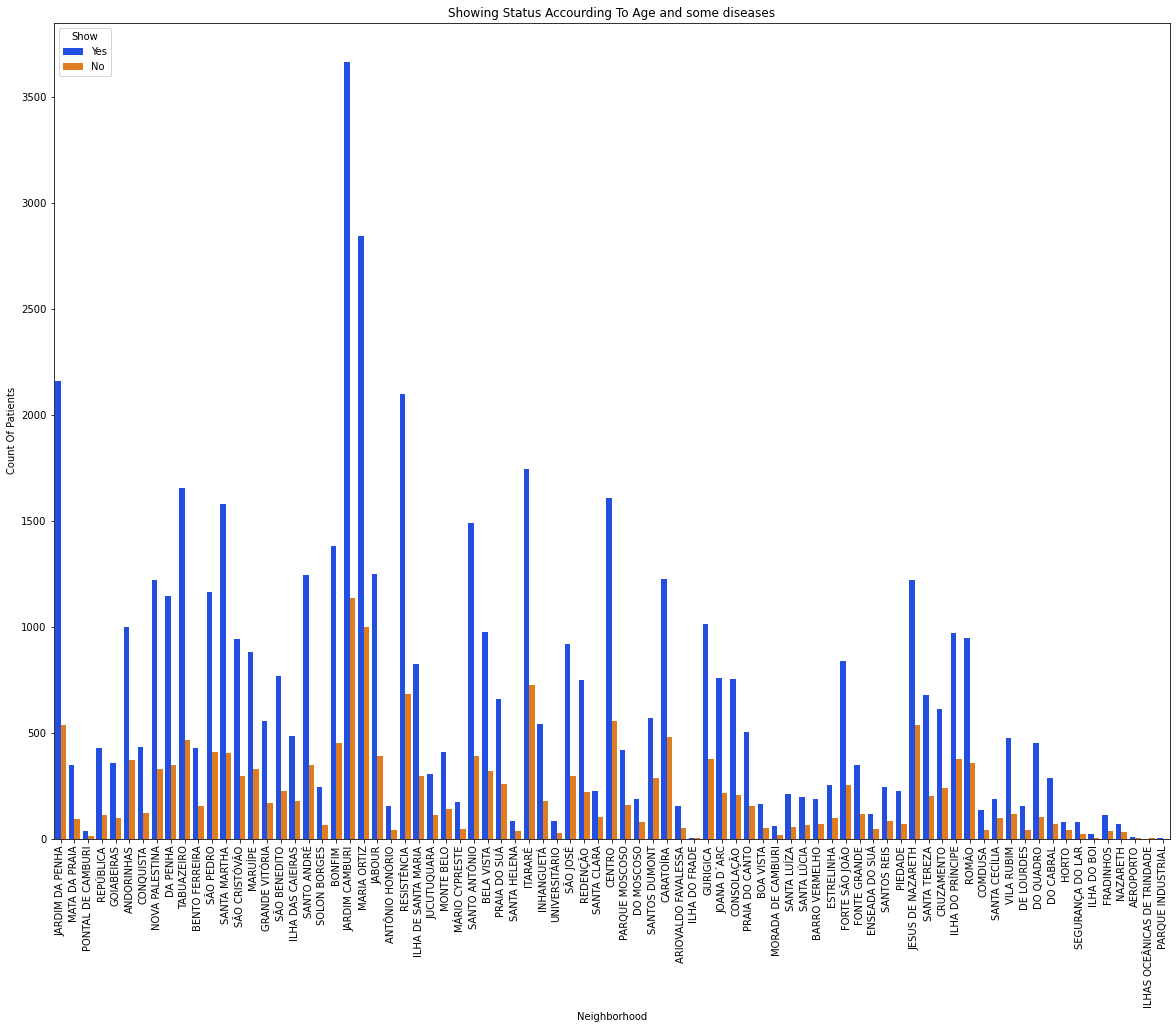

In [44]:
plt.figure(figsize=[20,15])
sns.countplot(x="Neighborhood", hue="Show",data=df,palette="bright")
plt.title('Showing Status Accourding To Age and some diseases')
plt.xlabel('Neighborhood')
plt.ylabel('Count Of Patients');
plt.xticks(rotation = 90);

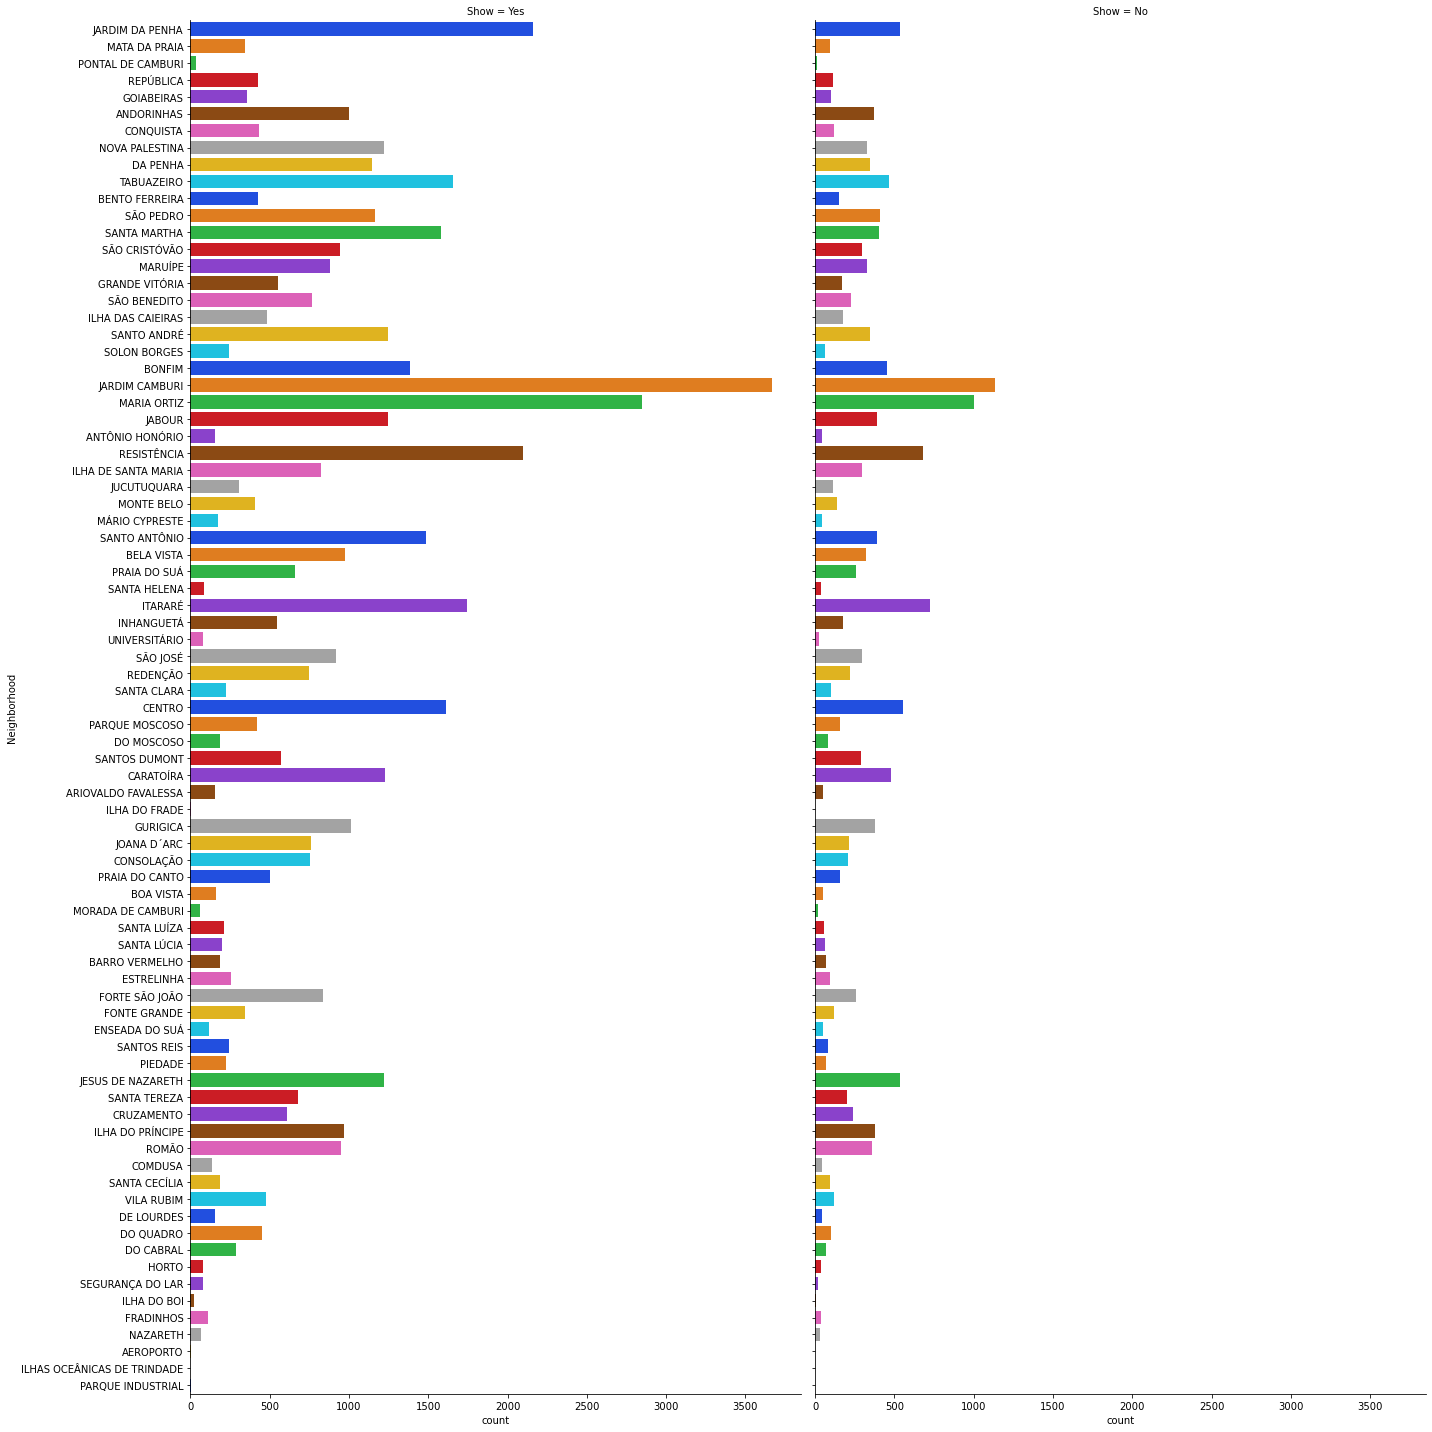

In [45]:
#This function show the relationship between a numerical and one or more categorical: seaborn.catplot
sns.catplot(y="Neighborhood", col="Show",data=df,kind="count",height=20,aspect=0.5,palette="bright");


I noticed that there is a strong relationship between the neighborhood and the showing or not

JARDIM DA PENHA	neighborhood have the most number of patients and most number of show patients 

and thats make ask a question about Neighborhood and ages because Neighborhood has a great relationship for showin or not 
## Is there a relation between living in certain area and ages that effected showing status ?

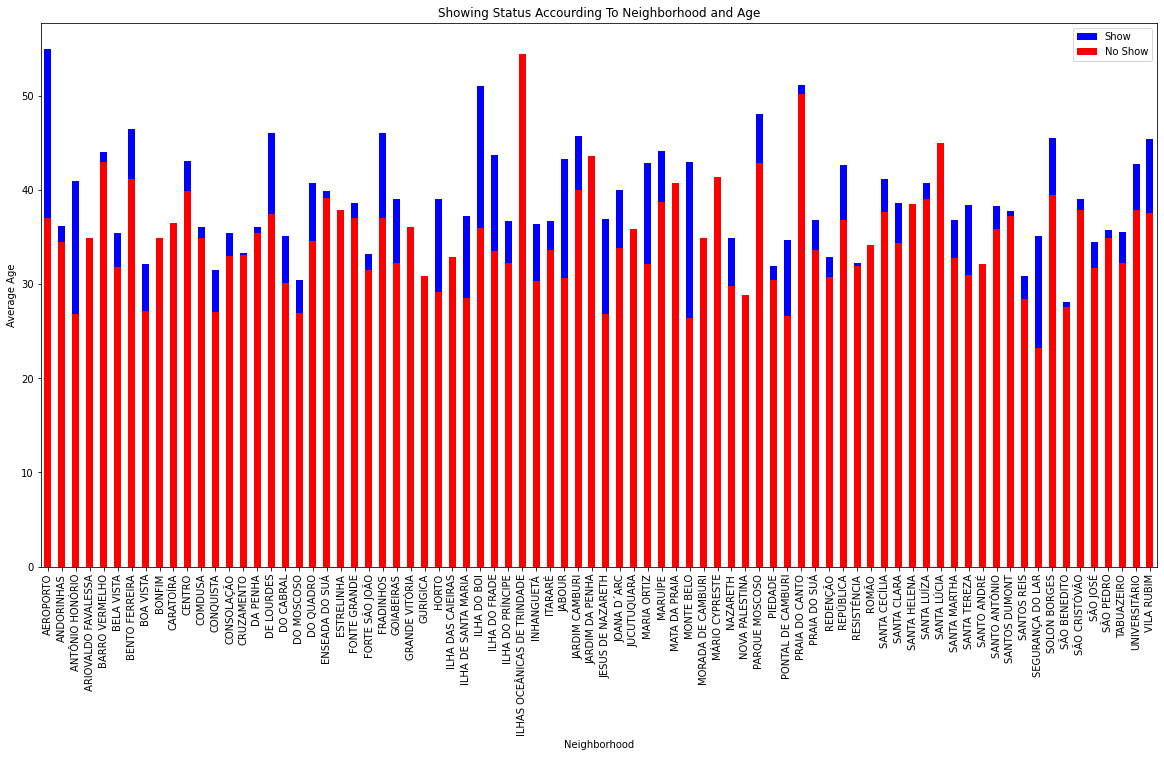

In [46]:
plt.figure(figsize=[20,10])
df[Show].groupby(['Neighborhood']).Age.mean().plot(kind='bar',color='blue',label='Show')
df[No_Show].groupby(['Neighborhood']).Age.mean().plot(kind='bar',color='red',label='No Show')
plt.title('Showing Status Accourding To Neighborhood and Age')
plt.xlabel('Neighborhood')
plt.ylabel('Average Age')
plt.legend();

yes there's a relationship between Neighborhood and Ages in some areas than other 

## Does Receiving SMS effect showing status?

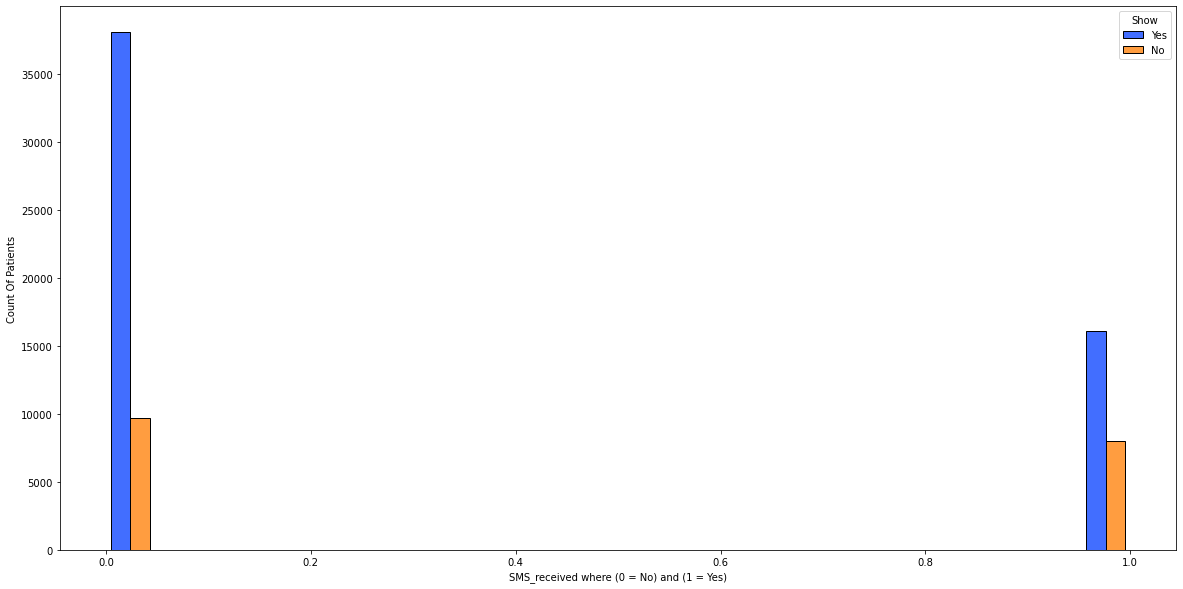

In [47]:
plt.figure(figsize=[20,10])
sns.histplot(data=df, x="SMS_received", hue="Show", multiple="dodge", shrink=.8,palette="bright");
plt.xlabel('SMS_received where (0 = No) and (1 = Yes)')
plt.ylabel('Count Of Patients');

I notice that the number of patients receiving sms and show is less than who doesn't receiving sms and show , That's mean we need to recheck the sms sysytem 

## last question, Is there a relation between receiving SMS and living in certain area that effected showing status ?

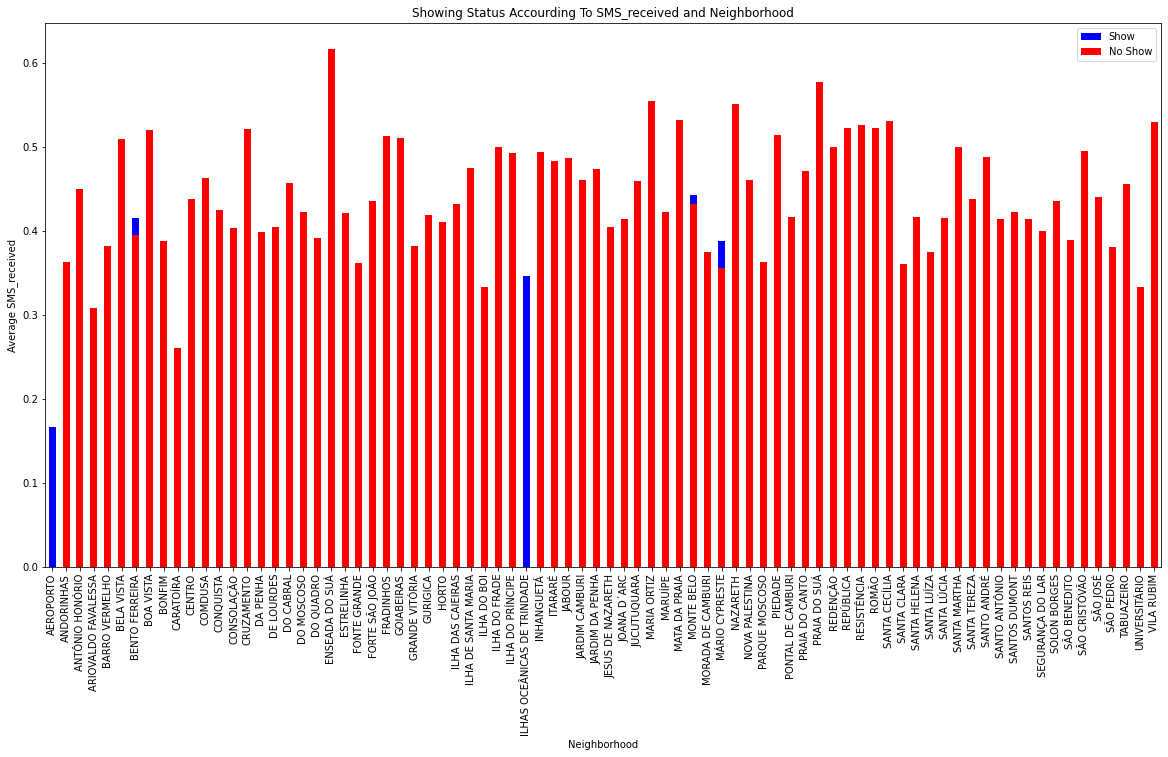

In [48]:
plt.figure(figsize=[20,10])
df[Show].groupby(['Neighborhood']).SMS_received.mean().plot(kind='bar',color='blue',label='Show')
df[No_Show].groupby(['Neighborhood']).SMS_received.mean().plot(kind='bar',color='red',label='No Show')
plt.title('Showing Status Accourding To SMS_received and Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average SMS_received')
plt.legend();

There's a response of sms in few number of Neighborhood almost 5 and two of them have a full response and this make me know and sure that there's a problem in sms system 

<a id='conclusions'></a>
## Conclusions
- Number of patients Shows is greater than who doesn't show

- From That we found that the gender has no effect in showing status because there is no much difference in showing status or not on each , in both females is larger , so we needs more investigation to know more relations between other factors

- We found thar from 0 : 11 ages Approximately is the most showing and that means his parents is care about them and the health of his kids then we notice that show growing from 45:55 Approximately and then fade and fade after 80 , 90 , 100,.....

- There is no relation between age and gender that effect the showing status , it's almost the same in show or no show for mean and median

- We notice that there are a proportional relationship between having one or the two diseases and no showing but this doesn't effect of the showing status

- I noticed that there is a strong relationship between the neighborhood and the showing or not

- There's a relationship between Neighborhood and Ages in some areas than other

- I notice that the number of patients receiving sms and show is less than who doesn't receiving sms and show , That's mean we need to recheck the sms sysytem , There's a response of sms in few number of Neighborhood almost 5 and two of them have a full response and this make me know and sure that there's a problem in sms system
